In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [41]:
common_path = "/Users/michaelpatsais/Documents/Uni_work/machine_learning/Data/StockData"
save_directory = "/Users/michaelpatsais/Documents/Uni_work/machine_learning/deep-learning-2024/Project2/plots"
df = pd.read_csv(common_path + '/AAPL.csv')

In [3]:
# turing dollars into integers
def strip_char(dataframe, column, char):

    df[str(column)] = df[str(column)].str.strip(str(char))
    df[str(column)] = df[str(column)].astype(float)

strip_char(df, 'Close/Last', '$')
strip_char(df, 'Open', '$')
strip_char(df, 'High', '$')
strip_char(df, 'Low', '$')


# # REMOVE 2024 DATA to us as test
df["Date"] = pd.to_datetime(df["Date"])

df_train = df[df['Date'].dt.year != 2024]
df_test = df[df['Date'].dt.year == 2024]


print(df_train.head())
print("-------------")
print(df_test.head())


['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']
         Date  Close/Last    Volume    Open    High      Low
59 2023-12-29      192.53  42672150  193.90  194.40  191.725
60 2023-12-28      193.58  34049900  194.14  194.66  193.170
61 2023-12-27      193.15  48087680  192.49  193.50  191.090
62 2023-12-26      193.05  28919310  193.61  193.89  192.830
63 2023-12-22      193.60  37149570  195.18  195.41  192.970
-------------
        Date  Close/Last     Volume     Open    High     Low
0 2024-03-26      169.71   57388450  170.000  171.42  169.58
1 2024-03-25      170.85   54288330  170.565  171.94  169.45
2 2024-03-22      172.28   71160140  171.760  173.05  170.06
3 2024-03-21      171.37  106181300  177.050  177.49  170.84
4 2024-03-20      178.67   53423100  175.720  178.67  175.09


In [4]:
# Taking feature from data
train_features = np.array(df_train['Close/Last'][:-1])
train_features = np.expand_dims(train_features, axis = 1) # expanding dims for model
test_features = np.array(df_test['Close/Last'][:-1])
test_features = np.expand_dims(test_features, axis = 1) # expanding dims for model

# taking label from data
train_labels = np.array(df_train['Close/Last'][1:].astype(float))
test_labels= np.array(df_test['Close/Last'][1:].astype(float))

# print(len(train_features) , train_features)
# print("------------")
# print(len(test_features), test_features)


# print(len(train_labels), train_labels)
# print("-------------")
# print(len(test_labels), test_labels)

2457 [[192.53  ]
 [193.58  ]
 [193.15  ]
 ...
 [ 19.3447]
 [ 19.1693]
 [ 19.1736]]
------------
58 [[169.71]
 [170.85]
 [172.28]
 [171.37]
 [178.67]
 [176.08]
 [173.72]
 [172.62]
 [173.  ]
 [171.13]
 [173.23]
 [172.75]
 [170.73]
 [169.  ]
 [169.12]
 [170.12]
 [175.1 ]
 [179.66]
 [180.75]
 [181.42]
 [182.63]
 [181.16]
 [182.52]
 [184.37]
 [182.32]
 [181.56]
 [182.31]
 [183.86]
 [184.15]
 [185.04]
 [187.15]
 [188.85]
 [188.32]
 [189.41]
 [189.3 ]
 [187.68]
 [185.85]
 [186.86]
 [184.4 ]
 [188.04]
 [191.73]
 [192.42]
 [194.17]
 [194.5 ]
 [195.18]
 [193.89]
 [191.56]
 [188.63]
 [182.68]
 [183.63]
 [185.92]
 [185.59]
 [186.19]
 [185.14]
 [185.56]
 [181.18]
 [181.91]
 [184.25]]


In [5]:
# # NORMALISING if more than 1 FEATURES
# if len(features_df.columns) > 4:
#     scaler = MinMaxScaler()
#     features_scaled = features_df
#     features_scaled[['Close/Last', 'Volume', 'High', 'Low']] = scaler.fit_transform(features_scaled[['Close/Last', 'Volume', 'High', 'Low']])

#     test_features_scaled = test_features_df
#     test_features_scaled[['Close/Last', 'Volume', 'High', 'Low']] = scaler.fit_transform(test_features_scaled[['Close/Last', 'Volume', 'High', 'Low']])

#     print(features_scaled)
#     print(test_features_scaled)

#     # Run scaled features
#     # Features
#     features = np.array(features_scaled[:-1].astype(float))
#     features = np.expand_dims(features, axis = 1) # expanding dims for model


#     # Test Features
#     test_features = np.array(test_features_scaled[:-1].astype(float))
#     test_features = np.expand_dims(test_features, axis = 1) # expanding dims for model

#     print(len(test_features), test_features.shape)
#     print(len(features), features.shape)

# else:
#     # Features
#     features = np.array(features_df[:-1].astype(float))
#     features = np.expand_dims(features, axis = 1) # expanding dims for model


#     # Test Features
#     test_features = np.array(test_features_df[:-1].astype(float))
#     test_features = np.expand_dims(test_features, axis = 1) # expanding dims for model

#     print(test_features[0], test_features.shape)
#     print(len(features), features.shape)


In [7]:
# build a model
batch_size = 150
epochs = 40

val_split = 0.35
dropout = 0.35

input_shape = train_features.shape
model = tf.keras.models.Sequential([

    tf.keras.layers.LSTM(128, input_shape = input_shape, return_sequences= True,  activation = "selu"),
    tf.keras.layers.LSTM(64, return_sequences= True, activation = "selu"),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.LSTM(32, return_sequences=True, activation = "selu"),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.LSTM(32, activation = "selu"),
    tf.keras.layers.Dense(32, activation = "selu"),

    tf.keras.layers.Dense(1, activation = "linear")
])

model.summary()

In [8]:
learning_rate = 0.0001
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

model.compile(optimizer = optimizer, loss = loss_fn, metrics=["MSE"])

In [9]:
history = model.fit(train_features, train_labels, epochs = epochs, batch_size = batch_size, validation_split=val_split)

Epoch 1/40
11/11 [==============================] - 3s 43ms/step - loss: 14056.6826 - MSE: 14056.6826 - val_loss: 840.0189 - val_MSE: 840.0189
Epoch 2/40
11/11 [==============================] - 0s 7ms/step - loss: 14028.4258 - MSE: 14028.4248 - val_loss: 835.6772 - val_MSE: 835.6772
Epoch 3/40
11/11 [==============================] - 0s 7ms/step - loss: 13997.9365 - MSE: 13997.9365 - val_loss: 829.8754 - val_MSE: 829.8754
Epoch 4/40
11/11 [==============================] - 0s 7ms/step - loss: 13962.4053 - MSE: 13962.4053 - val_loss: 823.2391 - val_MSE: 823.2391
Epoch 5/40
11/11 [==============================] - 0s 7ms/step - loss: 13922.5986 - MSE: 13922.5986 - val_loss: 815.1188 - val_MSE: 815.1187
Epoch 6/40
11/11 [==============================] - 0s 7ms/step - loss: 13872.6738 - MSE: 13872.6738 - val_loss: 805.7299 - val_MSE: 805.7299
Epoch 7/40
11/11 [==============================] - 0s 7ms/step - loss: 13815.8574 - MSE: 13815.8574 - val_loss: 794.4761 - val_MSE: 794.4761
Epoch

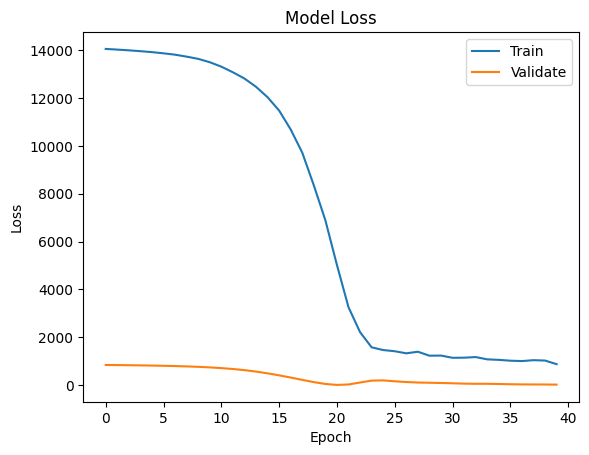

In [43]:
# summarize history for loss
plt.plot(history.history['loss'], label = "Train") # 'loss'
plt.plot(history.history['val_loss'], label = "Validate") # 'val_loss'
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
# plt.savefig(save_directory + "RNN_Reg_ModelLoss.png")
plt.show()

In [36]:
predictions = model.predict(test_features) # prediction of next close until -1 (feature corresponds to feature+1)
print(predictions)

2/2 [==============================] - 0s 3ms/step
[[147.3719 ]
 [148.25786]
 [149.36784]
 [148.66164]
 [154.31017]
 [152.31041]
 [150.48413]
 [149.63155]
 [149.92616]
 [148.4753 ]
 [150.10445]
 [149.73235]
 [148.16463]
 [146.8196 ]
 [146.913  ]
 [147.69063]
 [151.55254]
 [155.0733 ]
 [155.91283]
 [156.42844]
 [157.3589 ]
 [156.22838]
 [157.27435]
 [158.69522]
 [157.12059]
 [156.53615]
 [157.11293]
 [158.30373]
 [158.52638]
 [159.20926]
 [160.82628]
 [162.12706]
 [161.72173]
 [162.55519]
 [162.47112]
 [161.23201]
 [159.83034]
 [160.6042 ]
 [158.71825]
 [161.50752]
 [164.3268 ]
 [164.85309]
 [166.18668]
 [166.43796]
 [166.95552]
 [165.9734 ]
 [164.1971 ]
 [161.95885]
 [157.39732]
 [158.12715]
 [159.88402]
 [159.631  ]
 [160.09093]
 [159.28593]
 [159.60799]
 [156.24377]
 [156.80536]
 [158.60313]]


In [38]:
pred_df = pd.DataFrame()

pred_df["Date"] = df_test["Date"][1:]

pred_df['true_close'] = test_labels

predictions = np.array([prediction[0] for prediction in predictions])# [1:]
pred_df['pred_close'] = predictions

pred_df['delta'] = pred_df['true_close'] - pred_df['pred_close']

pred_df['deltapc'] = pred_df['delta'] / pred_df['true_close']

print(pred_df)


         Date  true_close  pred_close      delta   deltapc
1  2024-03-25      170.85  147.371902  23.478098  0.137419
2  2024-03-22      172.28  148.257858  24.022142  0.139437
3  2024-03-21      171.37  149.367844  22.002156  0.128390
4  2024-03-20      178.67  148.661636  30.008364  0.167954
5  2024-03-19      176.08  154.310165  21.769835  0.123636
6  2024-03-18      173.72  152.310410  21.409590  0.123242
7  2024-03-15      172.62  150.484131  22.135869  0.128235
8  2024-03-14      173.00  149.631546  23.368454  0.135078
9  2024-03-13      171.13  149.926163  21.203837  0.123905
10 2024-03-12      173.23  148.475296  24.754704  0.142901
11 2024-03-11      172.75  150.104446  22.645554  0.131089
12 2024-03-08      170.73  149.732346  20.997654  0.122987
13 2024-03-07      169.00  148.164627  20.835373  0.123286
14 2024-03-06      169.12  146.819595  22.300405  0.131861
15 2024-03-05      170.12  146.912994  23.207006  0.136416
16 2024-03-04      175.10  147.690628  27.409372  0.1565

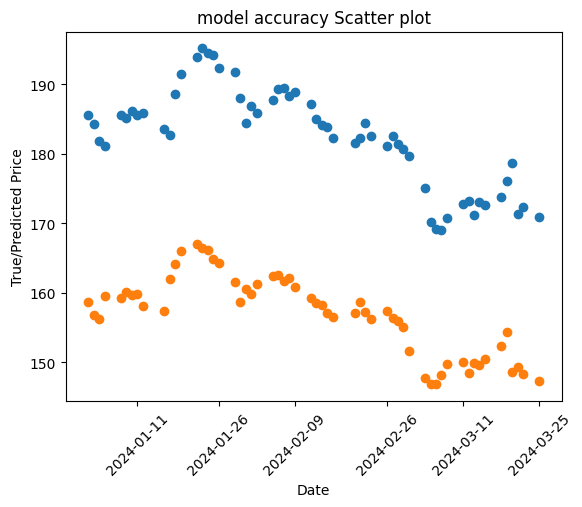

In [39]:
#true vs predicted 
plt.scatter(pred_df["Date"], pred_df['true_close'])
plt.scatter(pred_df["Date"] , pred_df['pred_close'])

plt.title('Time Series Plot')
plt.ylabel('True/Predicted Price')
plt.xlabel('Date')
plt.xticks(pred_df["Date"][0::10], rotation = 45)
# plt.savefig(save_directory + "RNN_Reg_TimeSeriesPlot.png")
plt.show()

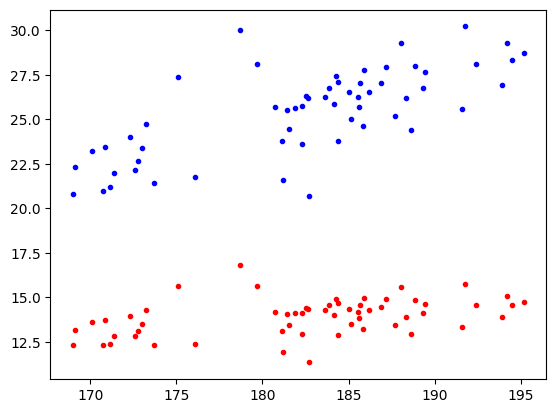

In [40]:
# residual plot
plt.plot(pred_df['true_close'], pred_df['delta'], "b.")
plt.plot(pred_df['true_close'], pred_df['deltapc']*100, "r.")
plt.show()

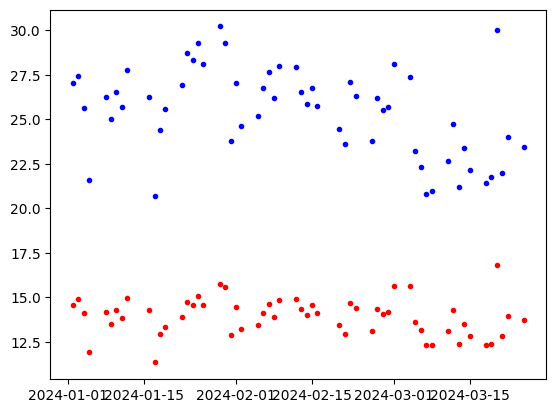

In [32]:
# residual plot
plt.plot(pred_df['Date'], pred_df['delta'], "b.")
plt.plot(pred_df['Date'], pred_df['deltapc']*100, "r.")
plt.show()